# IAS 150 Graphing

### Imports

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import migrant_functions as mf
import qgrid as qg
import matplotlib.pyplot as plt
import matplotlib as mtplt
import jordan as j
import random
from matplotlib import gridspec

In [2]:
migrant_data = pd.read_csv('migrant_table_final.csv').drop(columns=['Unnamed: 0'])

In [3]:
migrant_data.head()

,Code,Country,Year,Migration Type,Total Migration,Gender,Country 1,Country 1 Count,Country 2,Country 2 Count,...,Country 3 Count,Country 4,Country 4 Count,Country 5,Country 5 Count,Migrants Under 15 years old,Migrants 20-29 years old,Migrants 30-39 years old,Migrants 40-49 years old,Migrants 50 years old and older
0,192,Cuba,1990,Emigration,399117,female,United States of America,351002,Puerto Rico,9510,...,9264,Venezuela (Bolivarian Republic of),5874,Dominican Republic,3900,NaN,NaN,NaN,NaN,NaN
1,192,Cuba,1990,Emigration,436429,male,United States of America,385969,Spain,12590,...,10069,Venezuela (Bolivarian Republic of),5685,Dominican Republic,2924,NaN,NaN,NaN,NaN,NaN
2,192,Cuba,1990,Emigration,835546,total,United States of America,736971,Spain,21854,...,19579,Venezuela (Bolivarian Republic of),11559,Dominican Republic,6824,NaN,NaN,NaN,NaN,NaN
3,192,Cuba,1990,Immigration,17278,female,Spain,5394,Russian Federation,1728,...,1478,United States of America,577,China,507,815.0,259.0,940.0,1125.0,1738.0
4,192,Cuba,1990,Immigration,17277,male,Spain,5309,Russian Federation,2763,...,907,United States of America,609,Haiti,585,790.0,226.0,665.0,796.0,1096.0


In [47]:
# Compares Multiple Countries
# Arguments:
    # variable: Gender
    # variable_type: Male or Female
    # immigraiton_type: type of migration (Immigration or Emigration)
        # this is to be specified when looking at gender as the variable
    # interest_country_list: countries to compare
    # plot_type: 'line' or 'bar'

# either a bar graph or line graph
    # if bar, x = year, y=variable
    # if line, y=country, x=year

def multiple_pick_and_graph(migrant_data, variable, variable_type, immigration_type, interest_country_list, plot_type):
    selected_data = migrant_data.loc[(migrant_data[variable] == variable_type)
                                     & (migrant_data['Migration Type'] == immigration_type),:]
    
    picks = selected_data[['Country', 'Year', 'Total Migration']]
    
    if plot_type == 'line':
        
        plt.figure(figsize=(10,10))
    
        plt.style.use('seaborn-white')
#         my_dpi=96
#         plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

        region =['Cuba',
         'El Salvador',
         'Guatemala',
         'Honduras',
         'Mexico',
         'Venezuela (Bolivarian Republic of)']

        # multiple line plot
        country_list = list(np.unique(picks['Country']))
        end_values = []
        for country in country_list:
            country_picks = picks.loc[picks['Country'] == country,:]
            if country != interest_country_list[0]:
                plt.plot(country_picks['Year'].values, np.log(country_picks['Total Migration'].values), marker='', color='black', linewidth=1, alpha=0.4)
            else:
                end_value = picks.loc[picks['Country'] == country,:].values[6][2]
                plt.plot(country_picks['Year'].values, np.log(country_picks['Total Migration'].values), marker='', color='blue', linewidth=5, alpha=0.7)

        plt.xlim(1989, 2018);
        plt.ylim(7, 20);

        def rand_jitter(arr):
            stdev = .01*(max(arr)-min(arr))
            return arr + np.random.randn(len(arr)) * stdev



        plt.text(2019, np.log(end_value), interest_country_list[0], horizontalalignment='left', size='large', color='black')

        plt.title('Female' + ' ' + 'immigration ' + "For Each Country, by Year", loc='left', fontsize=15, fontweight=0, color='black');
        plt.xlabel("Year", size=15);
        plt.ylabel("log(Immigration)", size=15);
        plt.show()
        
    
    elif plot_type == 'bar': 
        
        plt.figure(figsize=(10,10))
        
        # set width of bar
        barWidth = 0.25

        # set height of bar
        bars = []
        for country in interest_country_list:            
            picks1 = picks.loc[picks['Country'] == country,:]
            bars1 = list(picks1.loc[:,'Total Migration'].values)
            bars.append(bars1)
        
        
        # Set position of bar on X axis
        current = np.arange(len(bars[0]))
        positions = [current]
        for bar in bars[1:]:
            r = [x + barWidth for x in current]
            positions.append(r)
            current = r

        #Make the plot
        for pos, bar, label in zip(positions, bars, interest_country_list):
            plt.bar(pos, bar, color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)), width=barWidth, edgecolor='white', label=label)

        # Add xticks on the middle of the group bars
        plt.title('Side by Side Comprison of ' + immigration_type + ' for Selected Countries, by Year', size=15)
        plt.xlabel('Year', fontweight='bold', size=15)
        plt.ylabel('Counts', fontweight='bold', size=15)
        plt.xticks([r + barWidth for r in range(len(bars[0]))], ['1990', '1995', '2000', 
                                                                 '2005', '2010', '2015', '2017'])


        # Create legend & Show graphic
        plt.legend(prop={'size': 15})
        plt.show()

    else:
        print('Not a valid visulization!')
        
        
    

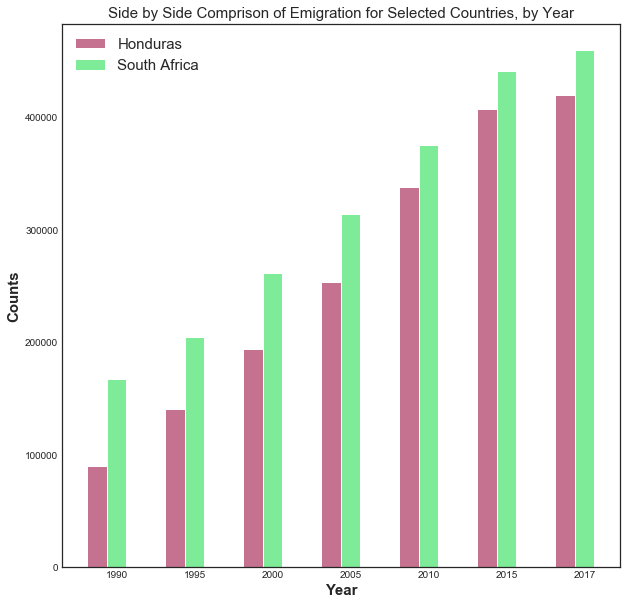

In [48]:
multiple_pick_and_graph(migrant_data, 'Gender', 'male', 'Emigration', ['Honduras', 'South Africa'], 'bar')

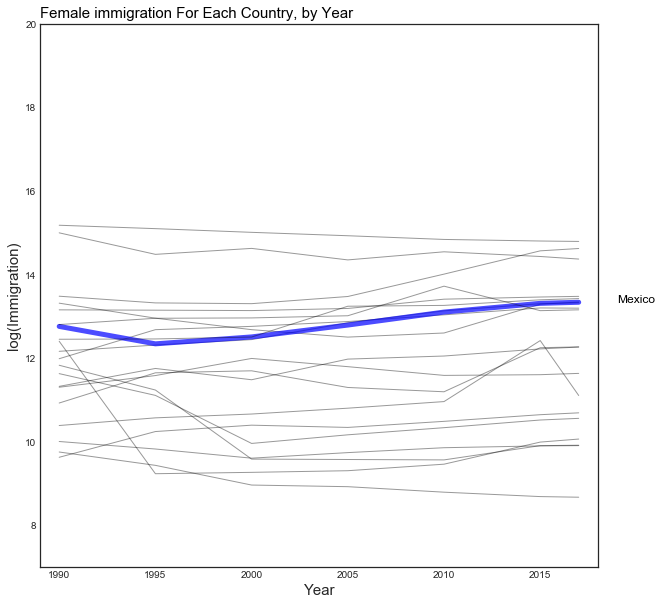

In [49]:
multiple_pick_and_graph(migrant_data, 'Gender', 'female', 'Immigration', ['Mexico'], 'line')

In [50]:
# Takes one country, and compares different aspects of it by gender (and possibly by year)
# Arguemnts:
    # country: Country of Interest
    # aspect: Numerical [1, 2, 3]
# Optional Argument(s):
    # Year (Defaults to False): If True, displays a cluster of bar graphs for each year
# Possible Aspects Key:
    # Aspect 1: Immgration
    # Aspect 2: Emigration
    # Aspect 3: Age Ranges (Immigration Only)



def one_pick_and_graph(country, aspect, year=False):
    
    conversion = {1:'Immigration', 2:'Emigration', 3:'Age Ranges (Immigration)'}
    
    
    if aspect not in [1, 2, 3]:
        print('Not a valid aspect to compare!')
        return
    
    if aspect == 1:
        selected_data = migrant_data.loc[(migrant_data['Country'] == country)
                                     & (migrant_data['Migration Type'] == 'Immigration'),:]
        
        if year:
            picks = selected_data[['Year', 'Gender', 'Total Migration']]
        else:
            picks = selected_data[['Gender', 'Total Migration']].groupby('Gender').agg(sum)
            
    elif aspect == 2:
        selected_data = migrant_data.loc[(migrant_data['Country'] == country)
                                     & (migrant_data['Migration Type'] == 'Emigration'),:]
        
        if year:
            picks = selected_data[['Year', 'Gender', 'Total Migration']]
        else:
            picks = selected_data[['Gender', 'Total Migration']].groupby('Gender').agg(sum)
        
    elif aspect == 3:
        selected_data = migrant_data.loc[(migrant_data['Country'] == country)
                                     & (migrant_data['Migration Type'] == 'Immigration'),:]
        if year:
            picks = selected_data[['Year', 'Gender', 'Migrants Under 15 years old',
                                   'Migrants 20-29 years old',
                                   'Migrants 30-39 years old',
                                   'Migrants 40-49 years old',
                                   'Migrants 50 years old and older']]
        else:
            picks = selected_data[['Gender', 'Migrants Under 15 years old',
                                   'Migrants 20-29 years old',
                                   'Migrants 30-39 years old',
                                   'Migrants 40-49 years old',
                                   'Migrants 50 years old and older']].groupby('Gender').agg(sum)
                                     
    
    if not year:
        plotty = picks.plot(kind='bar', figsize=(7,7));
        plt.xlabel('Gender', size=15)
        plt.ylabel('Counts', size=15)
        plt.title(conversion[aspect] + ' Counts', size=15)
    else:
        if aspect != 3:
            
            barWidth = 0.25

            # set height of bar
            bars = []
            for gender in ['female', 'male', 'total']:            
                picks1 = picks.loc[picks['Gender'] == gender,:]
                bars1 = list(picks1.loc[:,'Total Migration'].values)
                bars.append(bars1)


            # Set position of bar on X axis
            current = np.arange(len(bars[0]))
            positions = [current]
            for bar in bars[1:]:
                r = [x + barWidth for x in current]
                positions.append(r)
                current = r

            #Make the plot
            for pos, bar, label in zip(positions, bars, ['female', 'male', 'total']):
                plt.bar(pos, bar, color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)), width=barWidth, edgecolor='white', label=label)
                
            # Add xticks on the middle of the group bars
            plt.xlabel('Year', size=15)
            plt.xlabel('Counts', size=15)
            plt.title(conversion[aspect] + ' Counts by Year', size=15)
            plt.xticks([r + barWidth for r in range(len(bars[0]))], ['1990', '1995', '2000', 
                                                                     '2005', '2010', '2015', '2017'])
            plt.xlabel('Gender', size=15)
            plt.ylabel('Counts', size=15)
            fig_size = plt.rcParams["figure.figsize"]
            fig_size[0] = 7
            fig_size[1] = 7
            plt.legend()
        
        # CREATE SUBPLOTS
        else:
            
            fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,15));
            
            axes[0].set_title("Age Range Immigration by Year, Male", size=20)
            axes[0].set_ylabel('Counts', size=22)
            axes[0].set_xlabel('Year', size=22)
            axes[1].set_xlabel('Year', size=22)
            axes[1].set_title("Age Range Immigration by Year, Female", size=20)
            
            
            plt.legend(prop={'size': 6})
            
            
            for tick in axes[0].xaxis.get_major_ticks():
                tick.label.set_fontsize(22) 
                
            for tick in axes[1].xaxis.get_major_ticks():
                tick.label.set_fontsize(22)
                
            for tick in axes[0].yaxis.get_major_ticks():
                tick.label.set_fontsize(22) 
                
            
            male = picks.loc[picks['Gender'] == 'male'].drop(columns='Gender')
            m = male.plot(x='Year', kind='line', ax=axes[0]);
            m.legend(prop={'size': 15})
            
            female = picks.loc[picks['Gender'] == 'female'].drop(columns='Gender')
            f = female.plot(x='Year', kind='line', ax=axes[1], sharey = m);
            f.legend(prop={'size': 15})
            
            total = picks.loc[picks['Gender'] == 'total'].drop(columns='Gender')
            t = total.plot(x='Year', kind='line', figsize=(25,15));
            t.legend(prop={'size': 15})
            t.set_ylabel('Counts', size=22)
            t.set_xlabel('Year', size=22)
            t.set_title("Age Range Immigration by Year, Total", size=22)
            
            for tick in t.xaxis.get_major_ticks():
                tick.label.set_fontsize(22) 
                
            for tick in t.yaxis.get_major_ticks():
                tick.label.set_fontsize(22)
            
        


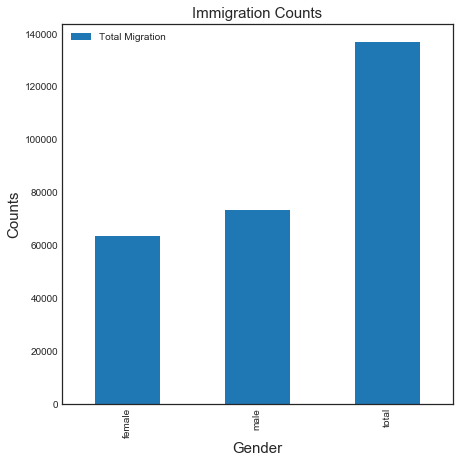

In [51]:
one_pick_and_graph('Cuba', 1, year=False)

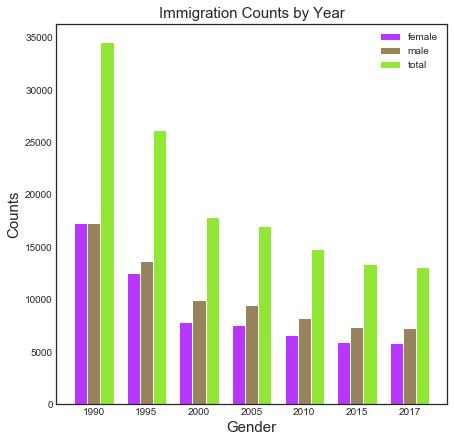

In [52]:
one_pick_and_graph('Cuba', 1, year=True)

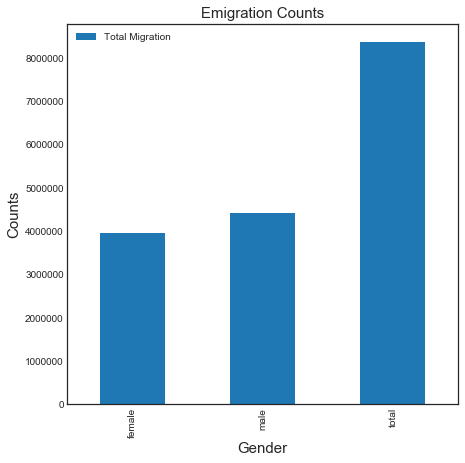

In [53]:
one_pick_and_graph('Cuba', 2, year=False)

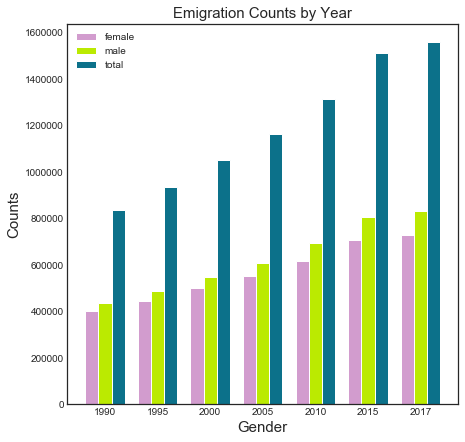

In [54]:
one_pick_and_graph('Cuba', 2, year=True)

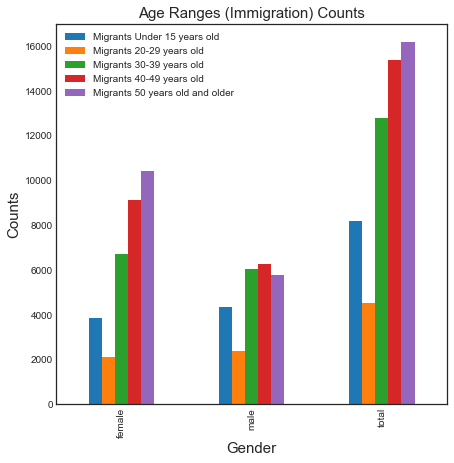

In [55]:
one_pick_and_graph('Cuba', 3, year=False)

No handles with labels found to put in legend.


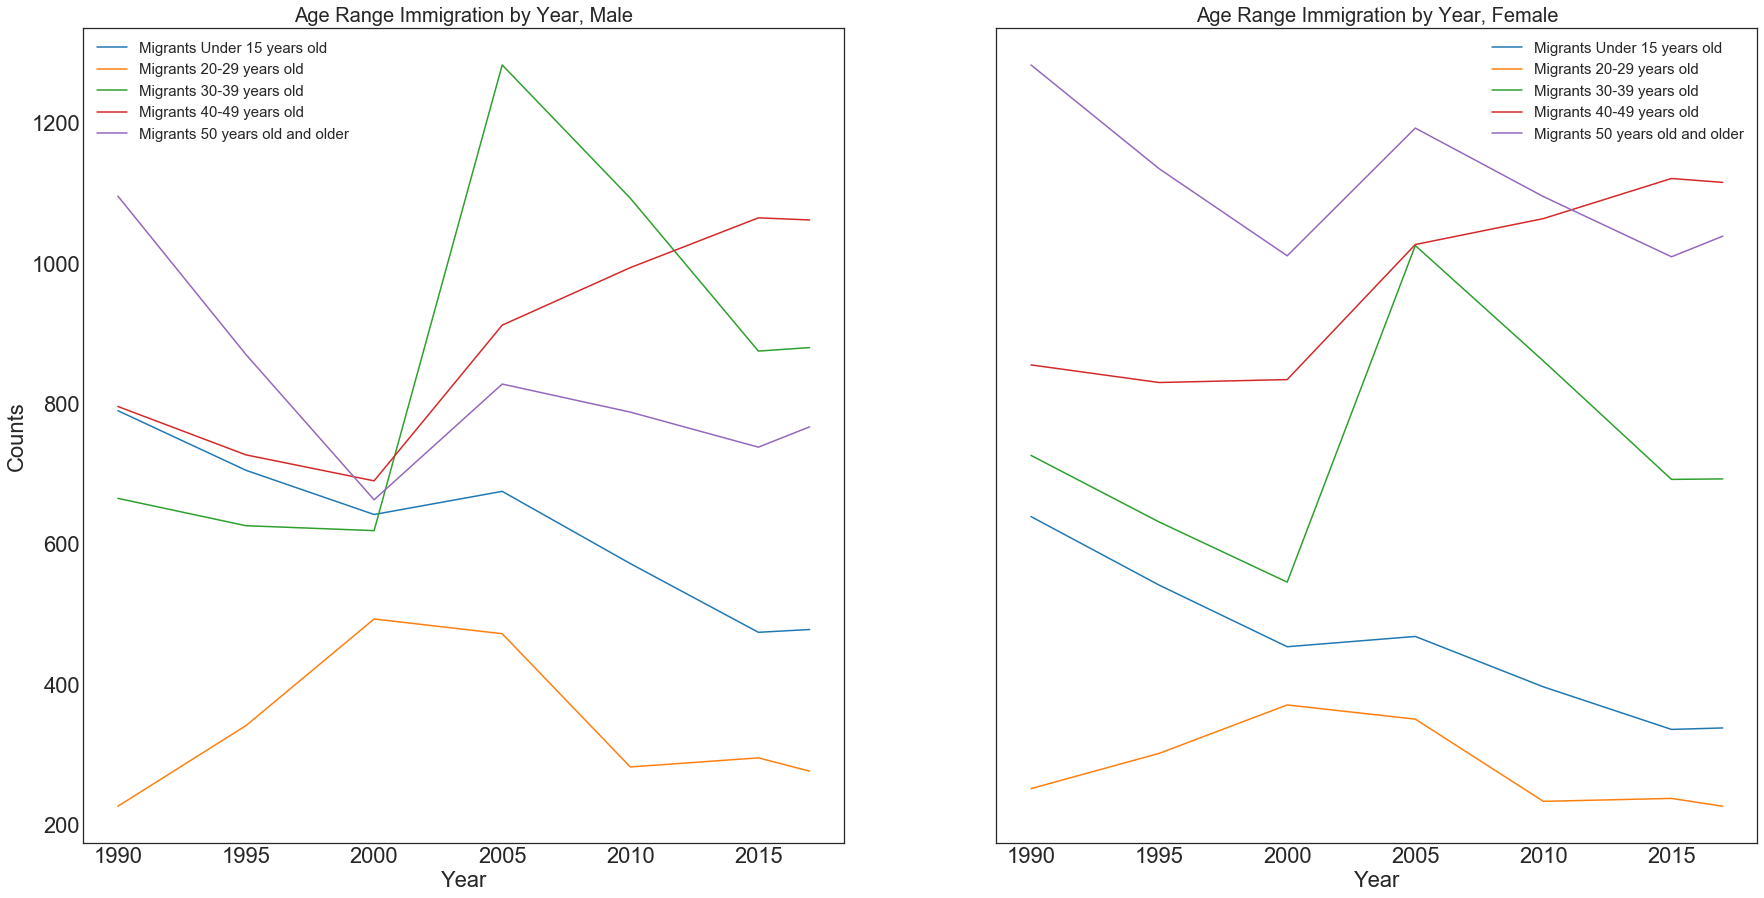

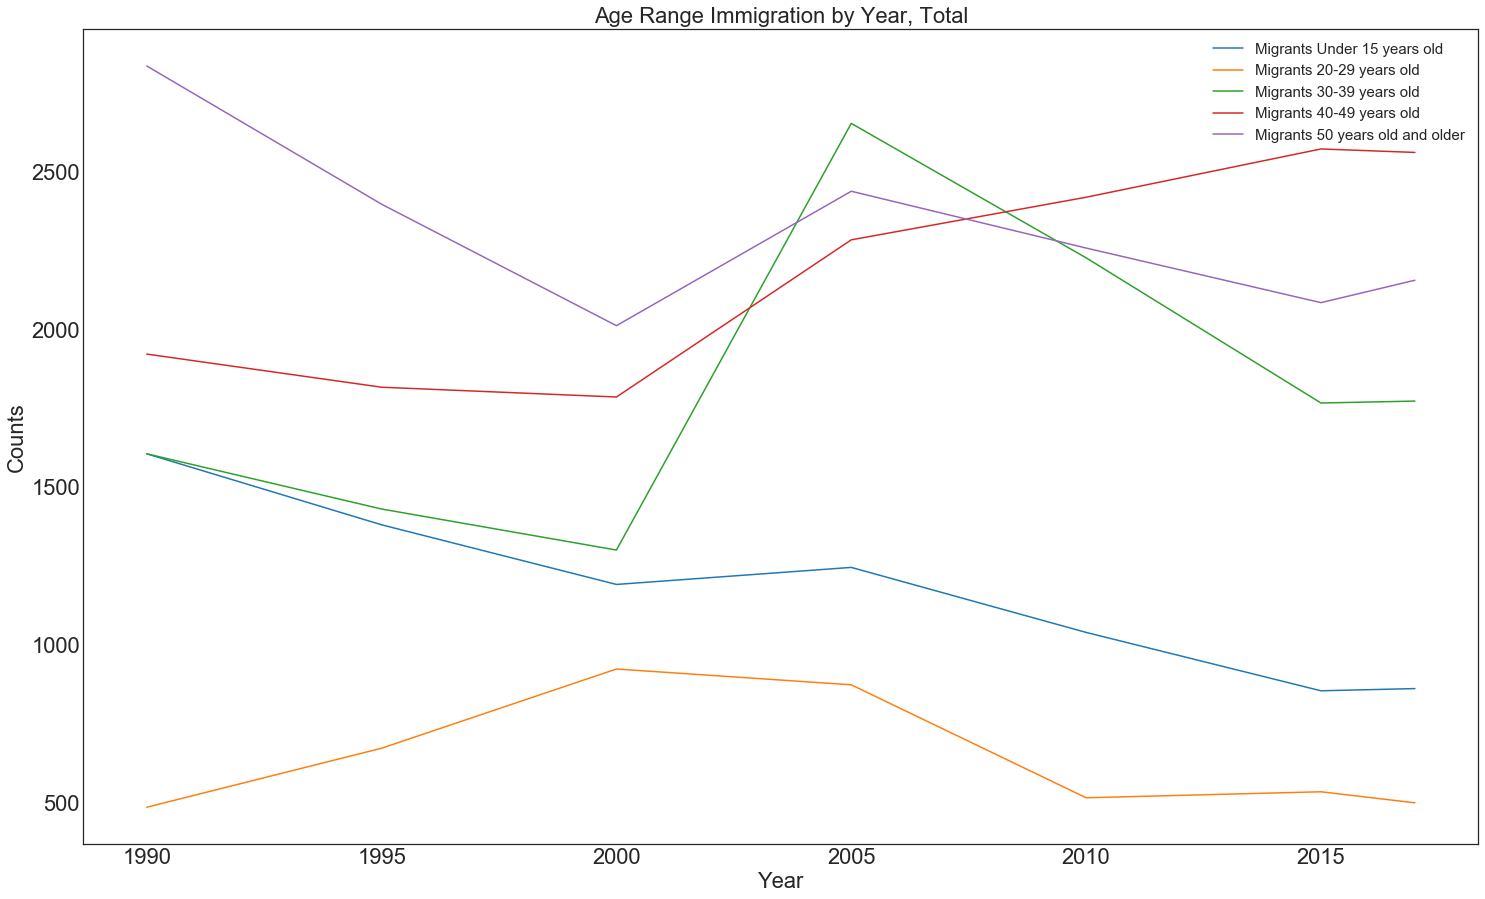

In [56]:
one_pick_and_graph('Cuba', 3, year=True)